<a href="https://colab.research.google.com/github/Aravindh020/Randomforest/blob/master/Spam_ham_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
df = pd.read_csv('spam.tsv', sep='\t')

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
import spacy

In [0]:
from spacy import displacy

In [0]:
nlp = spacy.load('en_core_web_sm')

In [7]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [0]:
import string
punct = string.punctuation
punct
def text_data_cleaning(sentance):
  doc1= nlp(doc)

In [9]:
df['label'].isnull().sum()

0

In [10]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [11]:
ham = df[df['label']=='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [12]:
spam = df[df['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [13]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [14]:
spam.shape[1]

4

In [0]:
ham = ham.sample(spam.shape[0])

In [16]:
data = ham.append(spam, ignore_index=True)
data.tail()

,label,message,length,punct
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3
1493,spam,This is the 2nd time we have tried 2 contact u...,160,8


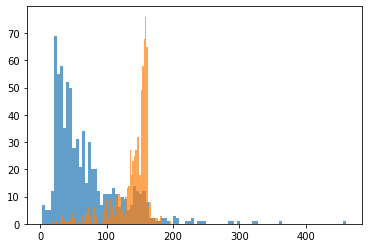

In [17]:
plt.hist(data[data['label']=='ham']['length'], bins = 100, alpha = 0.7)
plt.hist(data[data['label']=='spam']['length'], bins = 100, alpha = 0.7)

plt.show()

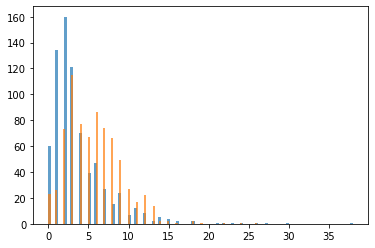

In [18]:
plt.hist(data[data['label']=='ham']['punct'], bins = 100, alpha = 0.7)
plt.hist(data[data['label']=='spam']['punct'], bins = 100, alpha = 0.7)

plt.show()

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
data.head()

,label,message,length,punct
0,ham,Why didn't u call on your lunch?,32,2
1,ham,"No, its true..k,Do u knw dis no. &lt;#&gt; ?",44,11
2,ham,and picking them up from various points,41,0
3,ham,Just sent you an email – to an address with in...,72,2
4,ham,Pick you up bout 7.30ish? What time are and t...,56,3


In [0]:
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size = 0.3, train_size=0.7, shuffle = True, stratify=data['label'])

In [0]:
vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)

In [24]:
X_train_vect.shape

(1045, 3785)

In [0]:
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', RandomForestClassifier(n_estimators=100, n_jobs=-1))])

In [26]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

In [0]:
y_pred = clf.predict(X_test)

In [28]:
confusion_matrix(y_test, y_pred)

array([[221,   3],
       [ 13, 212]])

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.94      0.99      0.97       224
        spam       0.99      0.94      0.96       225

    accuracy                           0.96       449
   macro avg       0.97      0.96      0.96       449
weighted avg       0.97      0.96      0.96       449



In [30]:
accuracy_score(y_test, y_pred)

0.9643652561247216

In [31]:
clf.predict(["SIX chances to win CASH! From 100 to 20,000 pounds"])

array(['spam'], dtype=object)

In [32]:
clf.predict(["I'm gonna be home soon and i don't want to talk about this stuff anymore tonight"])

array(['ham'], dtype=object)